In [12]:
def find_seed(f, c=0, eps = 2**(-26)): 
    

    def g(x,y):
            return f(x,y)-c

    b=1
    a=0
    
    if g(0,0) <= 0 <= g(0,1) or g(0,0) >= 0 >= g(0,1) : 
        while b-a > eps :
            t = (a+b)/2
            if g(0,t)*g(0,a) < 0 :
                b = t 
            elif g(0,t)*g(0,a) == 0 : 
                return t 
            else : 
                a = t 
        return t 
    else : 
        return False



In [13]:
#Exemples tests 

def h(x,y):
    return y**2 + 1

def g(x,y):
    return x**2 + y**2
    
find_seed(g,0.5)
        

0.7071067839860916

In [22]:
import autograd 
from autograd import numpy as np 
from math import exp

In [15]:
import autograd.numpy as np   # Thinly-wrapped version of Numpy
from autograd import grad


def gradient(f,x,y):
    g = autograd.grad
    return np.array([g(f,0)(x,y),g(f,1)(x,y)])


In [16]:
#Exemples test

gradient(f,1.0,1.0)

def f(x,y):
    return 3*x**2 + 2*y**2



In [17]:
import matplotlib.pyplot as plt


def simple_contour(f, c=0.0, delta = 0.01):
    
    xo = 0.0
    yo = find_seed(f,c)
    print(yo)
    
    les_x = [xo]
    les_y = [yo]
    
    while 0 <= xo <= 1 and 0 <= yo <= 1 : 
        
        grad_f = gradient(f, xo, yo)
        tangente = ( np.array([grad_f[1],- grad_f[0]]) * delta )/ (grad_f[1]**2 + grad_f[0]**2)**(1/2)
        
        x = xo + tangente[0]
        y = yo + tangente[1]
        les_x.append(x)
        les_y.append(y)
        xo = x
        yo = y 
    
    plt.plot(les_x, les_y)
    plt.show()


0.7071067839860916


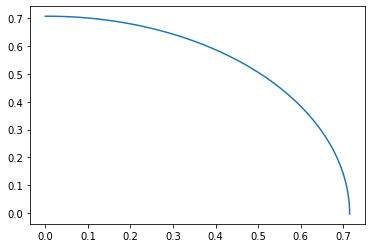

In [18]:
#Exemples test

def f(x,y):
    return x**2 + y**2

simple_contour(f,0.5)

In [29]:
def f(x,y):
    return x**2 + y**2

def h(x,y):
    return  2*( np.exp(-x**2 -y**2)-np.exp(-(x-1)**2 - (y-1)**2)) 

In [20]:
"""On redéfinit simple_contour et find_seed pour pouvoir les appliquer entre des points quelconques et pas que entre 0 et 1 
et on en définit également 2 nouvelles pour le cas horizontale (si on ne trouve pas de solution sur la verticale on cherchera sur l'horizontale)"""


def find_seed_v (f,xi ,yi, c=0, eps = 2**(-26)): 
    

    def g(x,y):
            return f(x,y)-c

    b=yi+1
    a=yi
    
    if g(xi,yi) <= 0 <= g(xi,yi+1) or g(xi,yi) >= 0 >= g(xi,yi+1) : 
        while b-a > eps :
            t = (a+b)/2
            if g(xi,t)*g(xi,a) < 0 :
                b = t 
            elif g(xi,t)*g(xi,a) == 0 : 
                return t 
            else : 
                a = t 
        return t 
    else : 
        #print('Pas trouvé')
        return False
    
def find_seed_h(f,xi ,yi, c=0, eps = 2**(-26)): 
    
    

    def g(x,y):
            return f(x,y)-c

    b=xi+1
    a=xi
    
    if g(xi,yi) <= 0 <= g(xi+1,yi) or g(xi,yi) >= 0 >= g(xi+1,yi) : 
        while b-a > eps :
            t = (a+b)/2
            if g(t,yi)*g(a,yi) < 0 :
                b = t 
            elif g(t,yi)*g(a,yi) == 0 : 
                return t 
            else : 
                a = t 
        return t 
    else : 
        return False
def simple_contour_v(f,xi, yi, c=0.0, delta = 0.01):
    
    xo = xi
    yo = find_seed_v(f,xi,yi,c)
    l1 = -1
    l2 = 1

    if yo != False :
        #print(yo)
    
        les_x = [xo]
        les_y = [yo]
    
        grad_f = gradient(f, xo, yo)
        tangente = ( np.array([l1*grad_f[1],l2*grad_f[0]]) * delta )/ (grad_f[1]**2 + grad_f[0]**2)**(1/2)        
        x = xo + tangente[0]
        y = yo + tangente[1]
        
        if x < xo : 
            l1, l2 = l2, l1
    
        while xi <= xo <= xi+1 and yi <= yo <= yi+1 :
            
            grad_f = gradient(f, xo, yo)
            tangente = ( np.array([l1*grad_f[1],l2*grad_f[0]]) * delta )/ (grad_f[1]**2 + grad_f[0]**2)**(1/2)
            
        
            x = xo + tangente[0]
            y = yo + tangente[1]
            les_x.append(x)
            les_y.append(y)
            xo = x
            yo = y 
    
        return (les_x, les_y)
    else : 
        return None
    
def simple_contour_h(f,xi, yi, c=0.0, delta = 0.01):
    
    xo = find_seed_h(f,xi,yi,c)
    yo = yi
    l1 = -1
    l2 = 1

    if xo != False :
        #print(xo)
    
        les_x = [xo]
        les_y = [yo]
    
        grad_f = gradient(f, xo, yo)
        tangente = ( np.array([l1*grad_f[1],l2*grad_f[0]]) * delta )/ (grad_f[1]**2 + grad_f[0]**2)**(1/2)        
        x = xo + tangente[0]
        y = yo + tangente[1]
        
        if y < yo : 
            l1, l2 = l2, l1
    
        while xi<= xo <= xi+1 and yi <= yo <= yi+1 :
            
            grad_f = gradient(f, xo, yo)
            tangente = ( np.array([l1*grad_f[1],l2*grad_f[0]]) * delta )/ (grad_f[1]**2 + grad_f[0]**2)**(1/2)
            
        
            x = xo + tangente[0]
            y = yo + tangente[1]
            les_x.append(x)
            les_y.append(y)
            xo = x
            yo = y 
    
        return (les_x, les_y)
    else : 
        return None



In [2]:
def contour(f, c=0.0, xc=[0.0, 1.0], yc = [0.0, 1.0], delta = 0.01):
    fig = plt.figure(figsize = [20,20])
    ax = plt.subplot(441)
    ax.set_xlim(left=xc[0], right =xc[-1])
    ax.set_ylim(bottom = yc[0], top = yc[-1])
    
    xs = []
    ys = []
    
    for xi in xc : 
        for yi in yc:
            
            if find_seed_v(f,xi,yi,c) != False : 
                #print('Trouvé verticale', (xi,yi))
                xs.append(simple_contour_v(f,xi,yi,c)[0]) 
                ys.append(simple_contour_v(f,xi,yi,c)[1])
            else :
                if find_seed_h(f,xi,yi,c) != False : 
                    #print('Trouvé horizon', (xi,yi))
                    xs.append(simple_contour_h(f,xi,yi,c)[0]) 
                    ys.append(simple_contour_h(f,xi,yi,c)[1])
    
    
            
    for x,y in zip(xs,ys):
        plt.plot(x,y)
        #print('plot')
    plt.show()
        

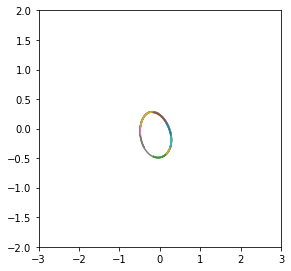

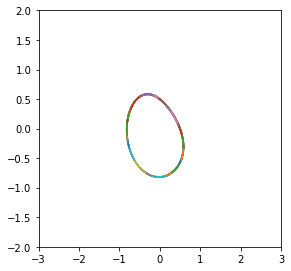

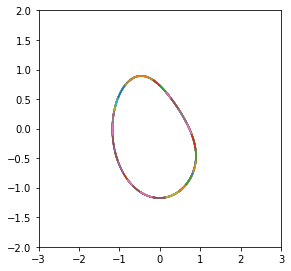

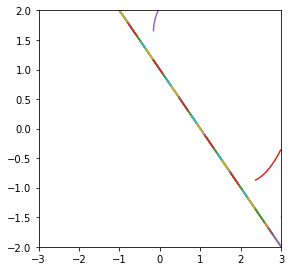

In [33]:
#Exemples tests

#contour(f, c=2.5, xc = list(np.linspace(-2,2,10)), yc = list(np.linspace(-2,2,10)))
contour(h, c=1.5, xc = list(np.linspace(-3,3,20)), yc = list(np.linspace(-2,2,20)) )
contour(h, c=1.0, xc = list(np.linspace(-3,3,20)), yc = list(np.linspace(-2,2,20)) )
contour(h, c=0.5, xc = list(np.linspace(-3,3,20)), yc = list(np.linspace(-2,2,20)) )
contour(h, c=0.0, xc = list(np.linspace(-3,3,20)), yc = list(np.linspace(-2,2,20)) )
